In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Initial Conditions

Here a flow with M1 = 2.81 is deflected by a wedge (wedge angle = 10 deg.)

The shock angle should form at 30 deg. for gamma = 5/3

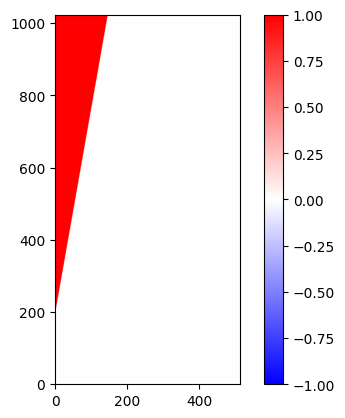

In [218]:
data = np.loadtxt("./output/bound-0.txt")
plt.imshow(data,origin='lower',cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()
bound = data

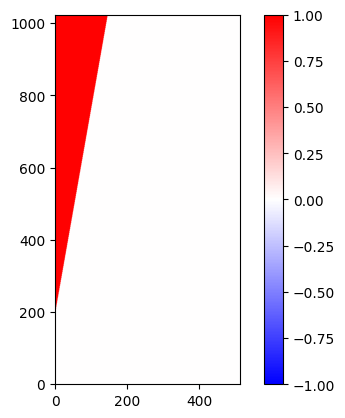

In [219]:
data = np.loadtxt("./output/bnx-0.txt")
plt.imshow(data,origin='lower',cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()

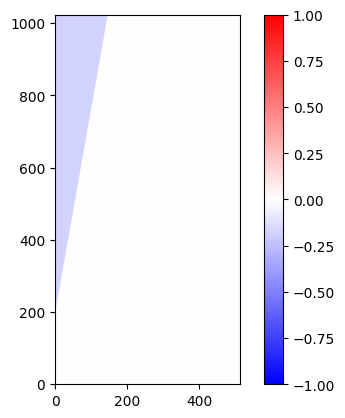

In [220]:
data = np.loadtxt("./output/bny-0.txt")
plt.imshow(data,origin='lower',cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()

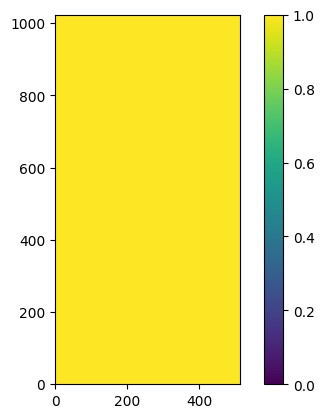

In [221]:
data = np.loadtxt("./output/rho-0.txt")
plt.imshow(data,vmin=0,origin='lower')
plt.colorbar()

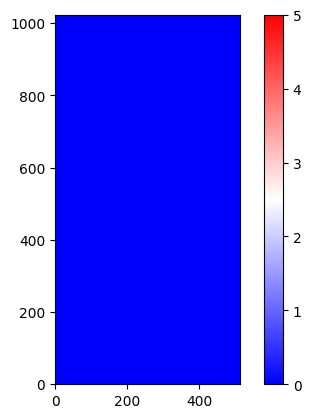

In [222]:
data = np.loadtxt("./output/u-0.txt")
plt.imshow(data,vmin=0,vmax=5,origin='lower',cmap='bwr')
plt.colorbar()

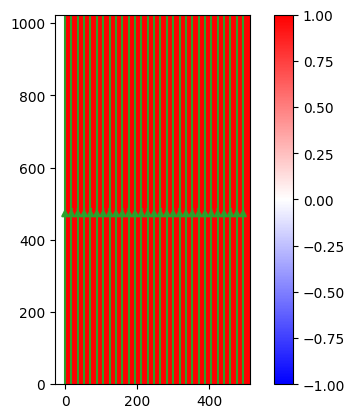

In [223]:
data = np.loadtxt("./output/v-0.txt")
plt.imshow(data,vmin=-1,vmax=1,origin='lower',cmap='bwr')
plt.colorbar()

v = np.loadtxt("./output/v-0.txt")
u = np.loadtxt("./output/u-0.txt")
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)
plt.streamplot(x,y,u,v, density=1.0, color='tab:green')

# Final Output

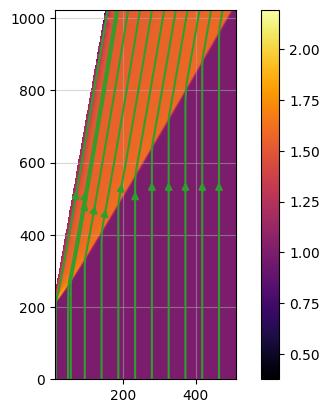

In [224]:
field = 'rho'
t = ''
data = np.loadtxt('./output/' + field + t + '.txt')
rho = data.copy()
rho[np.where(bound>0)] = float('nan')
plt.imshow(rho,origin='lower',cmap='inferno')
plt.colorbar()


v = np.loadtxt('./output/v' + t +'.txt')
u = np.loadtxt('./output/u' + t +'.txt')
v[np.where(bound>0)] = float('nan')
u[np.where(bound>0)] = float('nan')
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)
plt.streamplot(x,y,u,v, density=0.4, color='tab:green',broken_streamlines=False)
plt.ylim(ymin=0)
plt.xlim(xmin=10)
plt.grid(alpha=0.5)

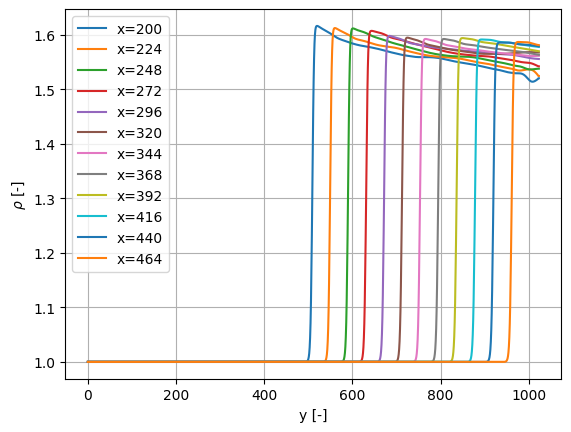

In [240]:
ny, nx = data.shape

xs, ys = [], []

for ii in range(200,470,(nx-20)//20):
    
    rho_out = data[:,ii]
    plt.plot(rho_out,label='x='+str(ii))
    
    xs.append(ii)
    ys.append(np.argmax(rho_out))
    
    

plt.grid()
plt.legend()
plt.xlabel('y [-]')
plt.ylabel('$\\rho$ [-]')

xs = np.asarray(xs)
ys = np.asarray(ys)

shock angle = 30.00 deg


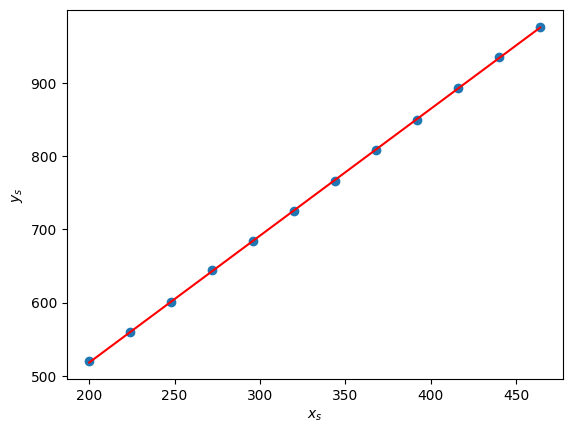

In [241]:
plt.plot(xs,ys,'o')
plt.xlabel('$x_s$')
plt.ylabel('$y_s$')

from scipy.optimize import curve_fit

def fn(x,m,c):
    return m*x + c

popt, pcov = curve_fit(fn, xs, ys)
plt.plot(xs, fn(xs, *popt), 'r-')

angle = np.arctan(popt[0])
print('shock angle = %1.2f deg'%(90-np.rad2deg(angle)))

# show pressure jump

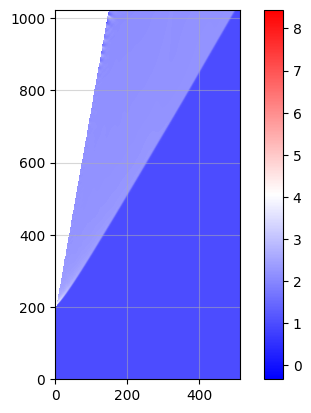

In [242]:
field = 'p'
p = np.loadtxt('./output/' + field + t + '.txt')
p[np.where(bound>0)] = float('nan')
plt.imshow(p,origin='lower',cmap='bwr')
plt.colorbar()
plt.grid(alpha=0.5)

Text(0, 0.5, '$p$ [-]')

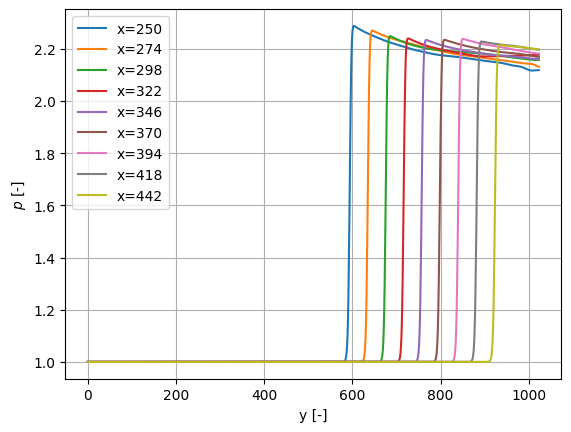

In [243]:
ny, nx = data.shape

for ii in range(250,450,(nx-20)//20):

    plt.plot(p[:,ii],label='x='+str(ii))

plt.grid()
plt.legend()
plt.xlabel('y [-]')
plt.ylabel('$p$ [-]')

# Analytical Result

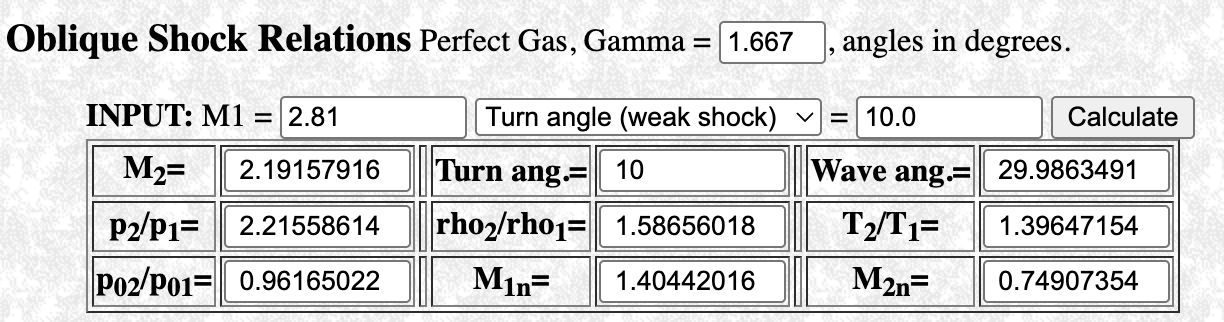